In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import model_from_json
from keras.utils.np_utils import to_categorical

from keras.optimizers import SGD


from keras import backend as K

Using TensorFlow backend.


In [2]:
model_name = '150'
load_test_npy = 'npy/150_adv001_test.npy'
load_train_npy = 'npy/150_adv001_train.npy'

In [3]:
label =['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = 10

In [4]:
def load_model(model_name):
    model = model_from_json(open('models/' + model_name + '_model.json').read())
    model.load_weights('weights/' + model_name + '_weights.h5')

    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

    return model

In [5]:
def predict(x, model_name):
    model = load_model(model_name)
    pred = model.predict(np.array([x]), batch_size=1)
    pred_class = np.argmax(pred)
    pred_per = max(pred[0])
    K.clear_session()

    return pred_class, pred_per

In [6]:
# データの読み込み
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 正規化
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

y_train_catego = to_categorical(y_train, num_classes)
y_test_catego = to_categorical(y_test, num_classes)

50000 train samples
10000 test samples


In [7]:
adv_test = np.load(load_test_npy)
print(adv_test.shape)

(10000, 32, 32, 3)


In [8]:
adv_train = np.load(load_train_npy)
print(adv_train.shape)

(50000, 32, 32, 3)


In [9]:
base_model = load_model(model_name)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [10]:
score = base_model.evaluate(x_test, y_test_catego, verbose=0)
print('x_test')
print('Test loss :', score[0])
print('Test accuracy :', score[1])

x_test
Test loss : 0.6013029506206512
Test accuracy : 0.7887


In [11]:
score = base_model.evaluate(adv_test, y_test_catego, verbose=0)
print('adv_test')
print('Test loss :', score[0])
print('Test accuracy :', score[1])

adv_test
Test loss : 0.7320480871677398
Test accuracy : 0.7458


In [12]:
pred_x_test_classes = base_model.predict_classes(x_test)
print(pred_x_test_classes.shape)

(10000,)


In [13]:
pred_adv_test_classes = base_model.predict_classes(adv_test)
print(pred_adv_test_classes.shape)

(10000,)


In [14]:
c = 0
pred_not_x_adv_y_idxs = []
for i in range(x_test.shape[0]):
    if (pred_x_test_classes[i] != int(y_test[i])) and (pred_adv_test_classes[i] != int(y_test[i])):
        if pred_x_test_classes[i] != pred_adv_test_classes[i]:
            c += 1
            pred_not_x_adv_y_idxs.append(i)
            
print(c)

36


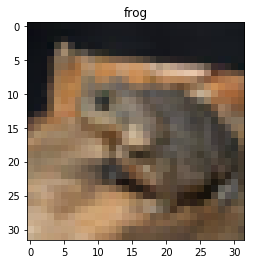

pred_x cat 0.4261138
pred_adv dog 0.44028065


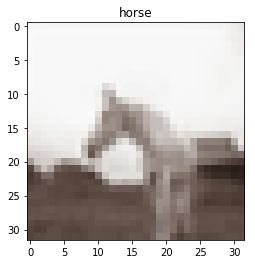

pred_x deer 0.16754492
pred_adv plane 0.16303033


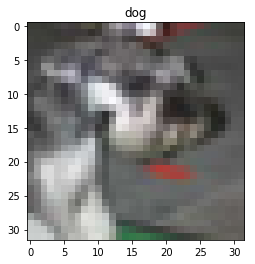

pred_x horse 0.30077812
pred_adv ship 0.34980065


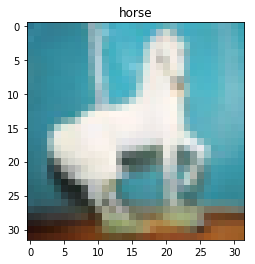

pred_x cat 0.2160797
pred_adv deer 0.22842762


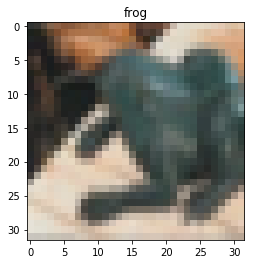

pred_x cat 0.23321302
pred_adv horse 0.24073897


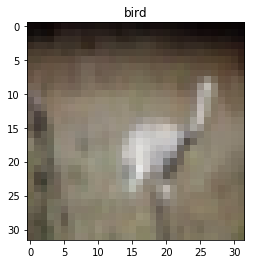

pred_x deer 0.36774236
pred_adv dog 0.39497444


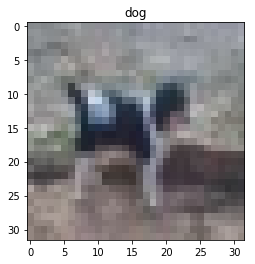

pred_x plane 0.34893414
pred_adv deer 0.40398932


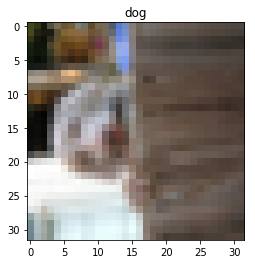

pred_x cat 0.38638464
pred_adv horse 0.43786317


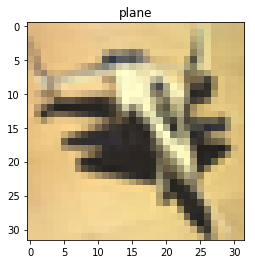

pred_x cat 0.30951026
pred_adv horse 0.3278435


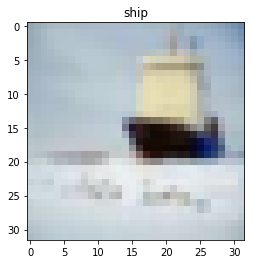

pred_x plane 0.37386185
pred_adv bird 0.39662713


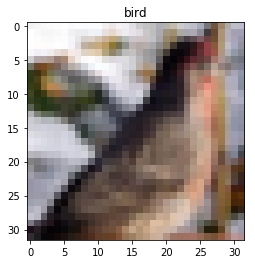

pred_x cat 0.38238683
pred_adv dog 0.4095222


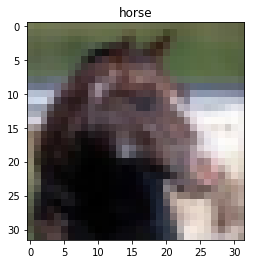

pred_x cat 0.279809
pred_adv frog 0.357818


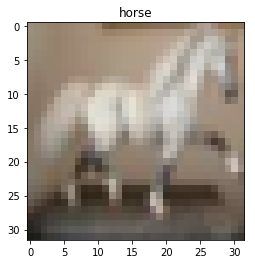

pred_x dog 0.35858658
pred_adv cat 0.40941572


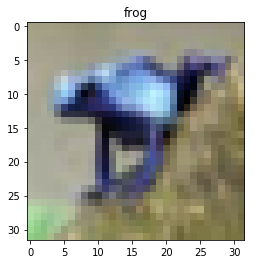

pred_x dog 0.32458466
pred_adv horse 0.33720723


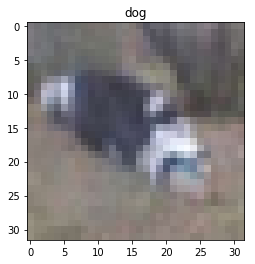

pred_x cat 0.2815463
pred_adv bird 0.2721248


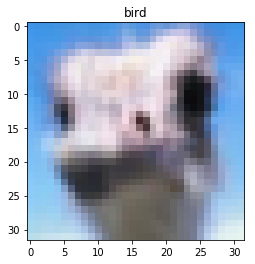

pred_x dog 0.35366255
pred_adv ship 0.37326577


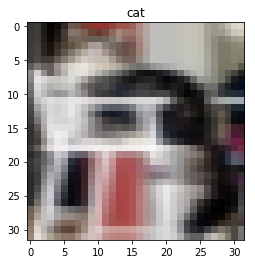

pred_x dog 0.36598107
pred_adv bird 0.36684695


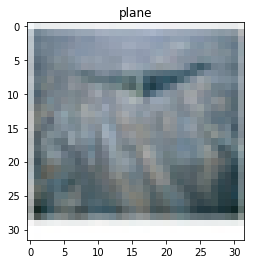

pred_x deer 0.29255238
pred_adv cat 0.3407075


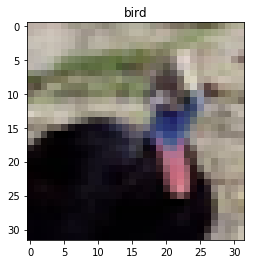

pred_x dog 0.21230353
pred_adv truck 0.22507381


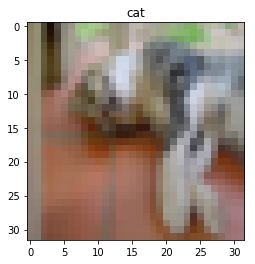

pred_x dog 0.3714002
pred_adv bird 0.4336766


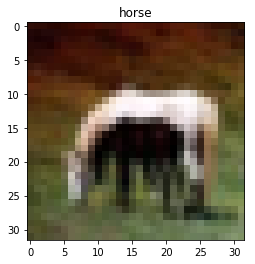

pred_x deer 0.35407034
pred_adv dog 0.39012218


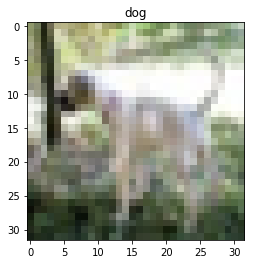

pred_x cat 0.3091089
pred_adv deer 0.30796555


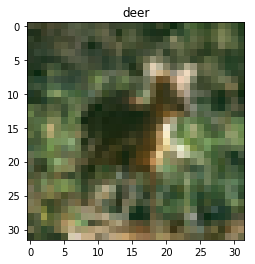

pred_x bird 0.341037
pred_adv frog 0.39043707


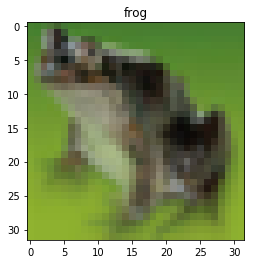

pred_x dog 0.34489563
pred_adv deer 0.35674474


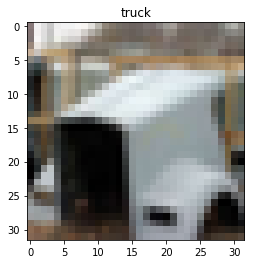

pred_x car 0.32026452
pred_adv bird 0.3386955


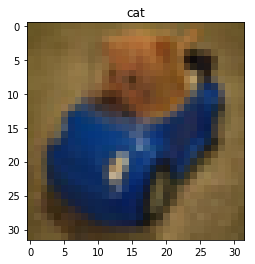

pred_x bird 0.19650523
pred_adv car 0.22481976


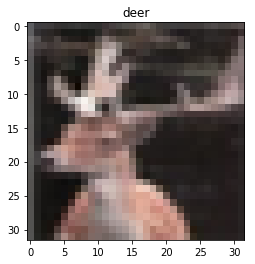

pred_x cat 0.37528107
pred_adv dog 0.4183181


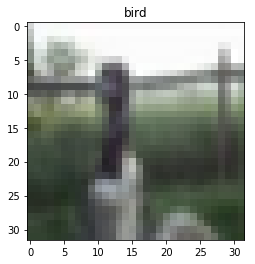

pred_x dog 0.29408014
pred_adv horse 0.34022564


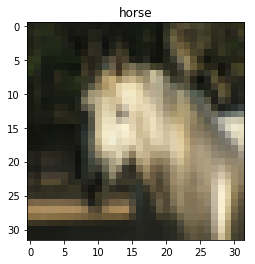

pred_x dog 0.35892937
pred_adv frog 0.3927124


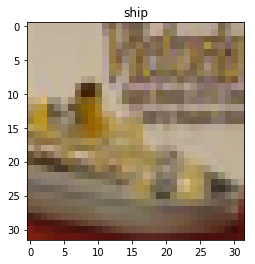

pred_x cat 0.32304797
pred_adv deer 0.31199396


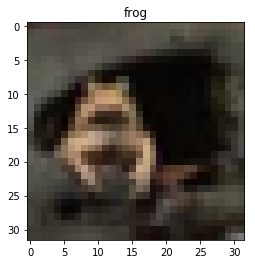

pred_x dog 0.43028104
pred_adv cat 0.4394509


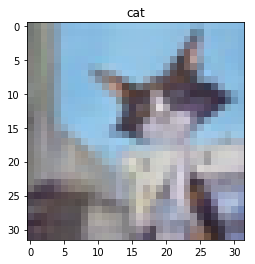

pred_x dog 0.29178655
pred_adv bird 0.3274125


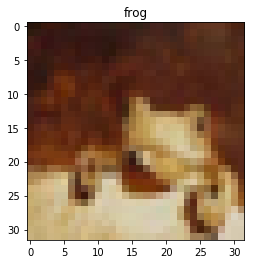

pred_x cat 0.35258028
pred_adv dog 0.38555777


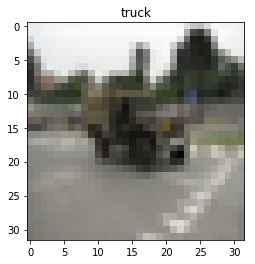

pred_x plane 0.275832
pred_adv cat 0.30974042


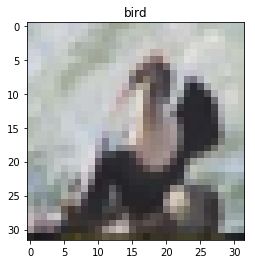

pred_x frog 0.22508553
pred_adv dog 0.21750808


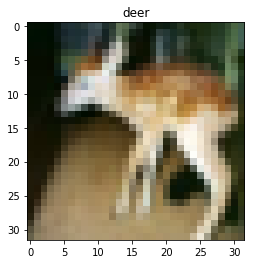

pred_x dog 0.35561
pred_adv cat 0.37697905


In [15]:
for i in pred_not_x_adv_y_idxs:
    pred_x_classes, pred_x_per = predict(x_test[i], model_name)
    pred_adv_classes, pred_adv_per = predict(adv_test[i], model_name)
    
    plt.imshow(x_test[i])
    plt.title(label[int(y_test[i])])
    plt.show()
    
    print('pred_x', label[pred_x_classes], pred_x_per)
    print('pred_adv', label[pred_adv_classes], pred_adv_per)

In [16]:
pred_not_x_y_idxs = np.where(pred_x_test_classes != list(map(int, y_test)))[0]
print(pred_not_x_y_idxs.shape)

(2113,)


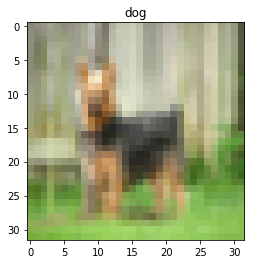

pred_x deer 0.93080795
pred_adv deer 0.94891644


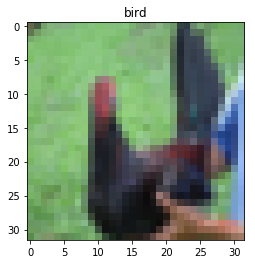

pred_x dog 0.2542297
pred_adv dog 0.26053077


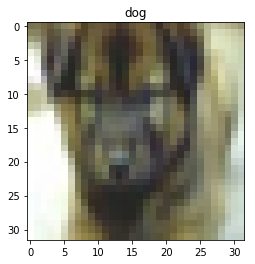

pred_x cat 0.47025135
pred_adv cat 0.50715005


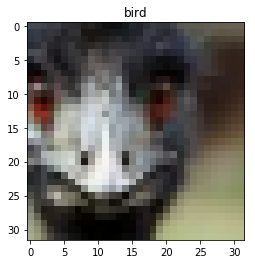

pred_x cat 0.7450072
pred_adv cat 0.7745735


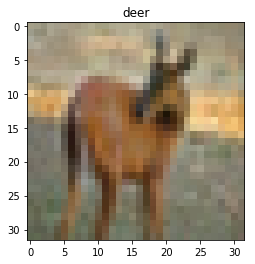

pred_x horse 0.531023
pred_adv horse 0.65071064


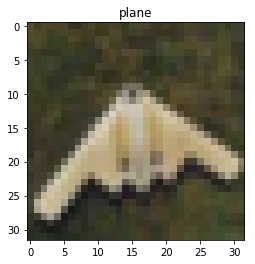

pred_x horse 0.55820185
pred_adv horse 0.58035016


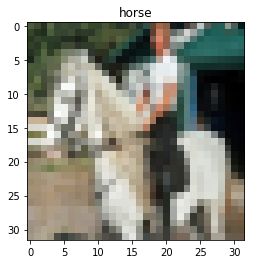

pred_x dog 0.3421532
pred_adv dog 0.36562464


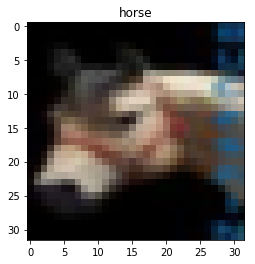

pred_x cat 0.40148756
pred_adv cat 0.4435191


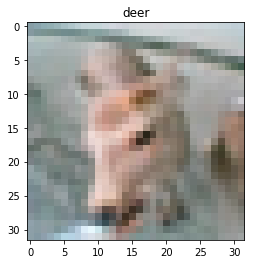

pred_x dog 0.8176462
pred_adv dog 0.8596312


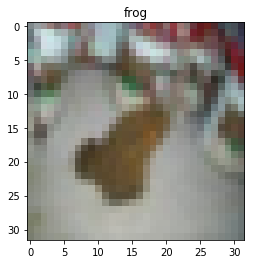

pred_x cat 0.36428463
pred_adv cat 0.3773506


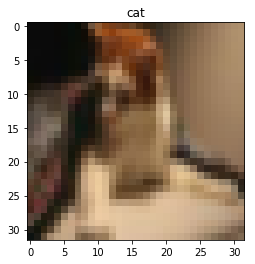

pred_x dog 0.8513281
pred_adv dog 0.8782023


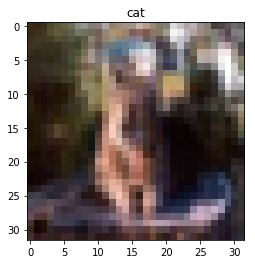

pred_x dog 0.52336
pred_adv dog 0.62652695


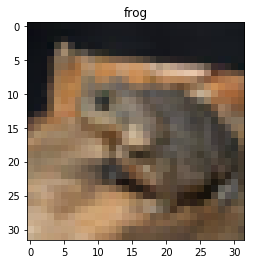

pred_x cat 0.4261138
pred_adv dog 0.44028065


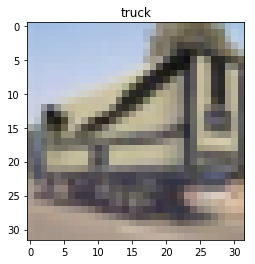

pred_x plane 0.7582484
pred_adv plane 0.7519141


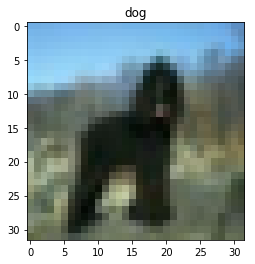

pred_x horse 0.80325
pred_adv horse 0.85654014


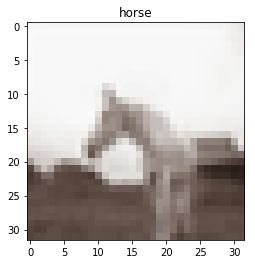

pred_x deer 0.16754492
pred_adv plane 0.16303033


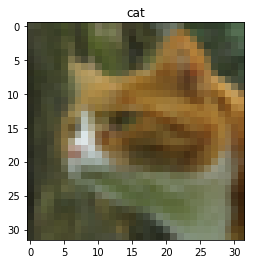

pred_x frog 0.38450208
pred_adv frog 0.4159323


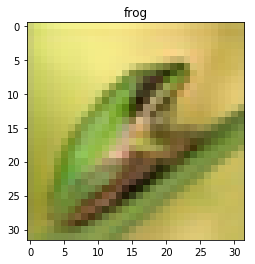

pred_x bird 0.5840452
pred_adv bird 0.689609


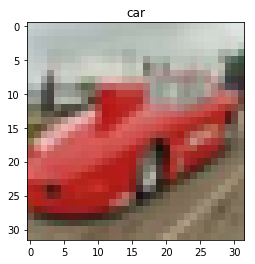

pred_x truck 0.7480135
pred_adv truck 0.8213988


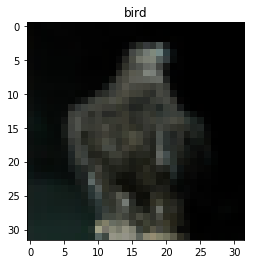

pred_x cat 0.4706624
pred_adv cat 0.5031807


In [17]:
for i in pred_not_x_y_idxs[:20]:
    pred_x_classes, pred_x_per = predict(x_test[i], model_name)
    pred_adv_classes, pred_adv_per = predict(adv_test[i], model_name)
    
    plt.imshow(x_test[i])
    plt.title(label[int(y_test[i])])
    plt.show()
    
    print('pred_x', label[pred_x_classes], pred_x_per)
    print('pred_adv', label[pred_adv_classes], pred_adv_per)

In [18]:
pred_not_x_adv_idxs = np.where(pred_x_test_classes != pred_adv_test_classes)[0]
print(pred_not_x_adv_idxs.shape)

(465,)


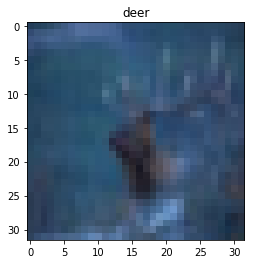

pred_x deer 0.49822798
pred_adv plane 0.53404164


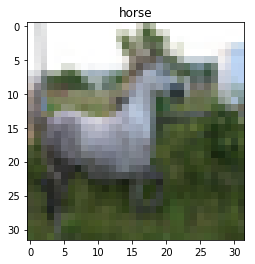

pred_x horse 0.4845256
pred_adv truck 0.41945767


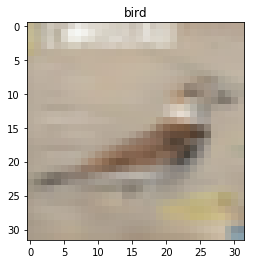

pred_x bird 0.31164518
pred_adv plane 0.29193357


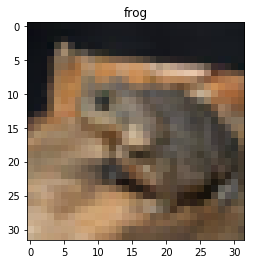

pred_x cat 0.4261138
pred_adv dog 0.44028065


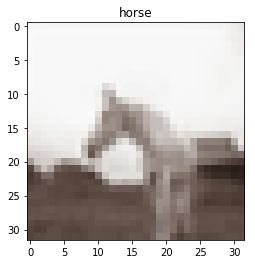

pred_x deer 0.16754492
pred_adv plane 0.16303033


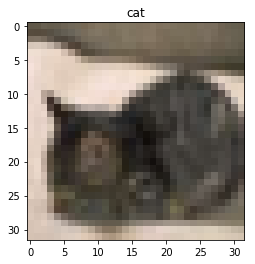

pred_x cat 0.39413643
pred_adv horse 0.32918552


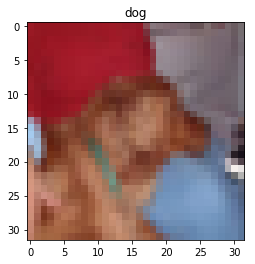

pred_x dog 0.51627153
pred_adv cat 0.5046739


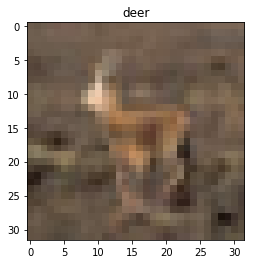

pred_x deer 0.5526993
pred_adv frog 0.42516723


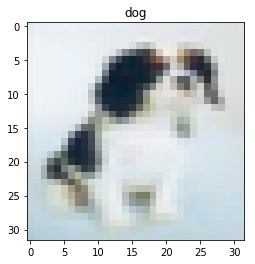

pred_x dog 0.5033517
pred_adv cat 0.51423985


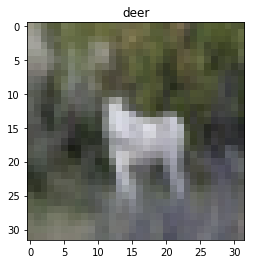

pred_x deer 0.4919045
pred_adv dog 0.39063594


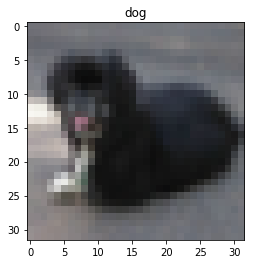

pred_x dog 0.49345207
pred_adv cat 0.5507479


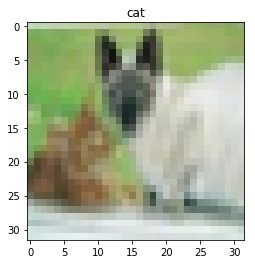

pred_x cat 0.42815295
pred_adv dog 0.4818658


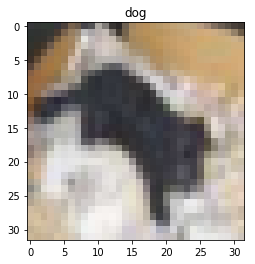

pred_x dog 0.3401567
pred_adv bird 0.36345604


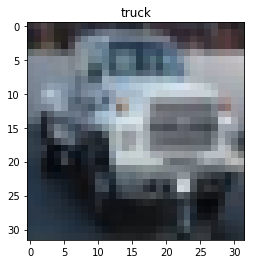

pred_x truck 0.50171804
pred_adv car 0.65116775


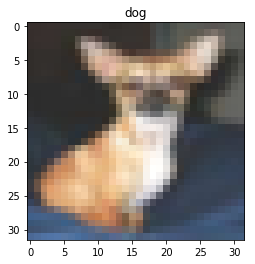

pred_x dog 0.5416886
pred_adv cat 0.5203488


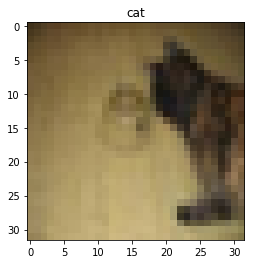

pred_x cat 0.37529695
pred_adv dog 0.43430158


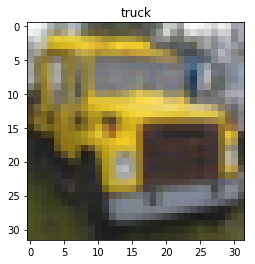

pred_x truck 0.5213518
pred_adv car 0.5940408


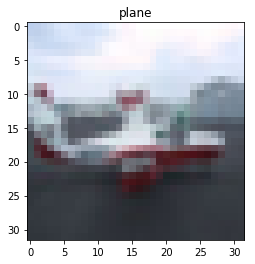

pred_x plane 0.5405295
pred_adv ship 0.58862346


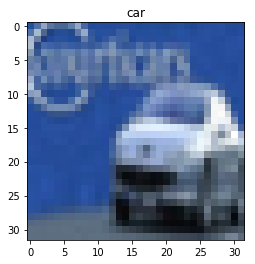

pred_x car 0.43847784
pred_adv plane 0.44256917


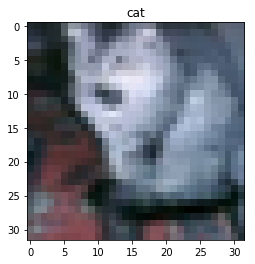

pred_x cat 0.19646361
pred_adv deer 0.18634668


In [19]:
for i in pred_not_x_adv_idxs[:20]:
    pred_x_classes, pred_x_per = predict(x_test[i], model_name)
    pred_adv_classes, pred_adv_per = predict(adv_test[i], model_name)
    
    plt.imshow(x_test[i])
    plt.title(label[int(y_test[i])])
    plt.show()
    
    print('pred_x', label[pred_x_classes], pred_x_per)
    print('pred_adv', label[pred_adv_classes], pred_adv_per)

In [23]:
base_model = load_model(model_name)

In [24]:
pred_x_train_classes = base_model.predict_classes(x_train)
print(pred_x_train_classes.shape)

(50000,)


In [25]:
pred_adv_train_classes = base_model.predict_classes(adv_train)
print(pred_adv_train_classes.shape)

(50000,)


In [26]:
c = 0
pred_not_train_x_adv_y_idxs = []
for i in range(x_train.shape[0]):
    if (pred_x_train_classes[i] != int(y_train[i])) and (pred_adv_train_classes[i] != int(y_train[i])):
        if pred_x_train_classes[i] != pred_adv_train_classes[i]:
            c += 1
            pred_not_train_x_adv_y_idxs.append(i)
            
print(c)

71


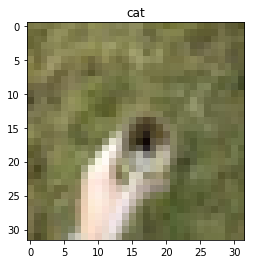

pred_x frog 0.26307172
pred_adv dog 0.23256162


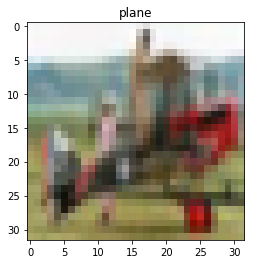

pred_x horse 0.50454056
pred_adv truck 0.41893828


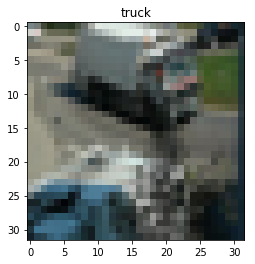

pred_x deer 0.29420826
pred_adv car 0.24620922


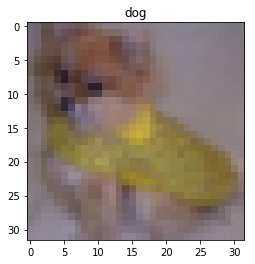

pred_x bird 0.38036057
pred_adv cat 0.30603096


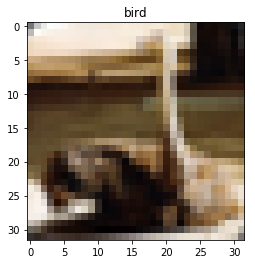

pred_x truck 0.4200118
pred_adv cat 0.34591562


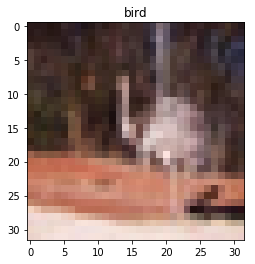

pred_x cat 0.4393971
pred_adv deer 0.42395896


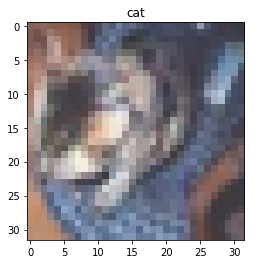

pred_x frog 0.28495887
pred_adv dog 0.2857893


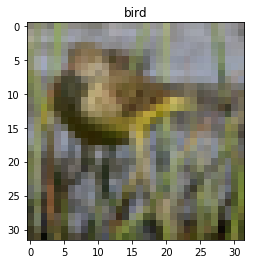

pred_x frog 0.47497267
pred_adv deer 0.47734556


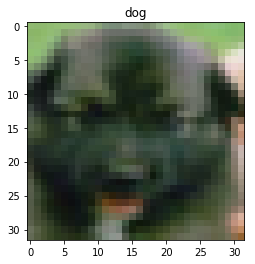

pred_x frog 0.3862439
pred_adv cat 0.32589677


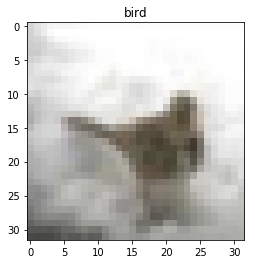

pred_x cat 0.26020208
pred_adv dog 0.23143446


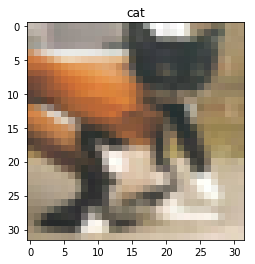

pred_x dog 0.2173169
pred_adv bird 0.22114234


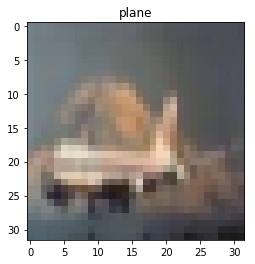

pred_x frog 0.31418058
pred_adv truck 0.2765562


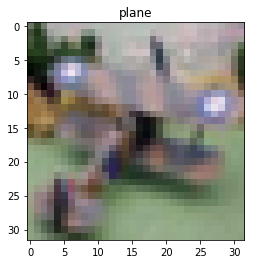

pred_x deer 0.24210282
pred_adv cat 0.23156331


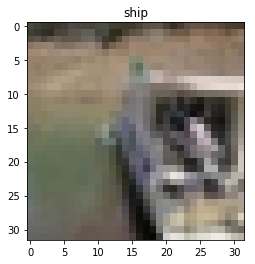

pred_x dog 0.32956696
pred_adv bird 0.32887223


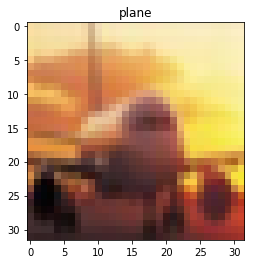

pred_x frog 0.21369419
pred_adv cat 0.20285028


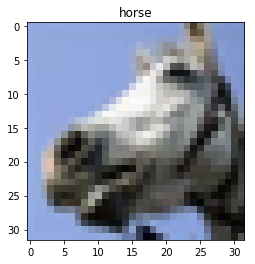

pred_x bird 0.2865411
pred_adv deer 0.26365525


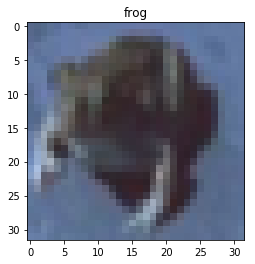

pred_x dog 0.46217126
pred_adv cat 0.421733


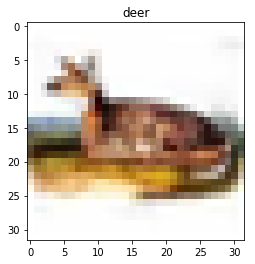

pred_x plane 0.28859717
pred_adv cat 0.28419563


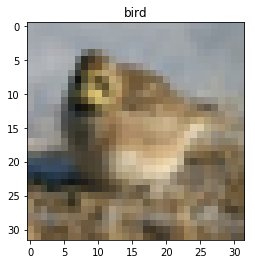

pred_x dog 0.28315735
pred_adv cat 0.25544164


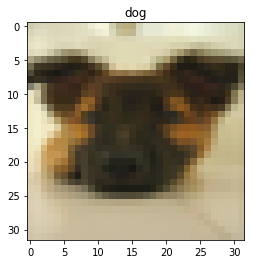

pred_x frog 0.4221532
pred_adv cat 0.37384224


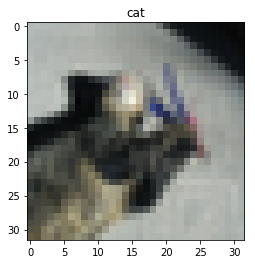

pred_x frog 0.3555741
pred_adv dog 0.33435223


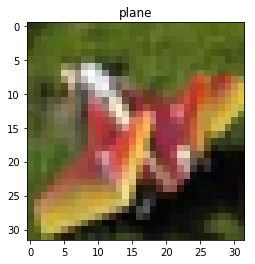

pred_x horse 0.27874073
pred_adv frog 0.26959386


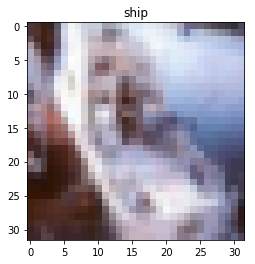

pred_x dog 0.4983136
pred_adv cat 0.4130544


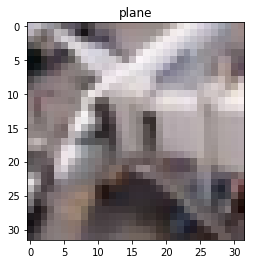

pred_x dog 0.38688654
pred_adv horse 0.35719585


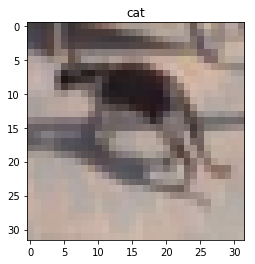

pred_x bird 0.266832
pred_adv dog 0.2565887


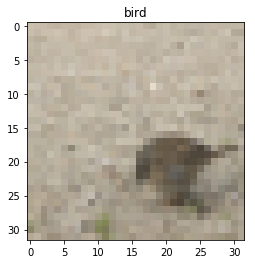

pred_x frog 0.34737813
pred_adv deer 0.32423893


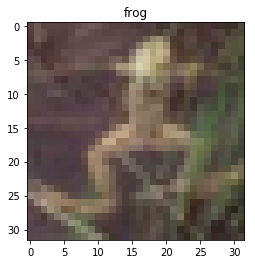

pred_x deer 0.34444436
pred_adv cat 0.2987638


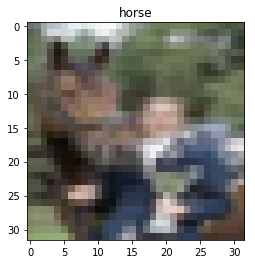

pred_x deer 0.21102726
pred_adv dog 0.2045158


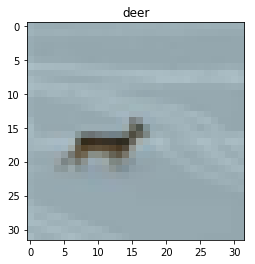

pred_x plane 0.36705452
pred_adv bird 0.35000038


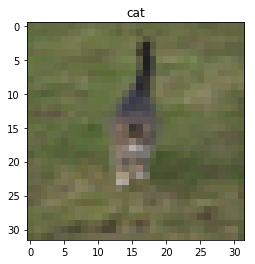

pred_x deer 0.49357703
pred_adv bird 0.4619567


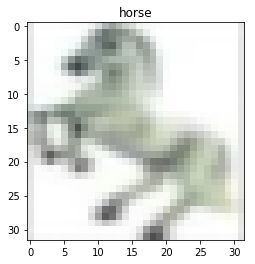

pred_x cat 0.36617172
pred_adv plane 0.33941415


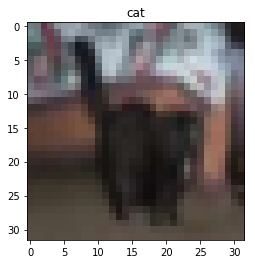

pred_x horse 0.34078982
pred_adv dog 0.29200244


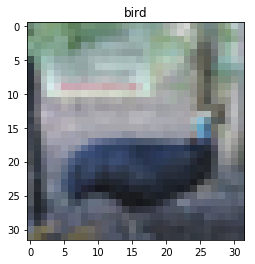

pred_x ship 0.2853078
pred_adv cat 0.22750974


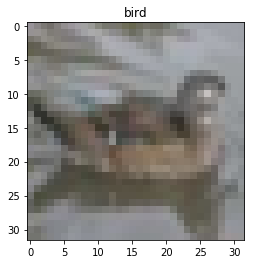

pred_x ship 0.28420454
pred_adv cat 0.21132429


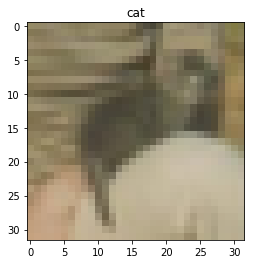

pred_x deer 0.48260078
pred_adv bird 0.4442614


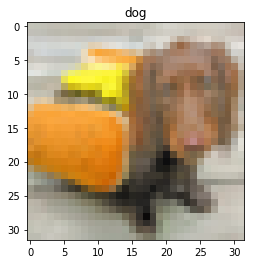

pred_x truck 0.34130502
pred_adv cat 0.36127016


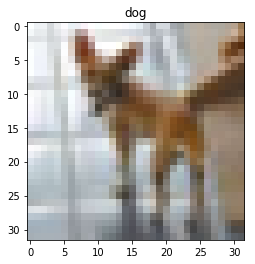

pred_x deer 0.41618207
pred_adv cat 0.33079582


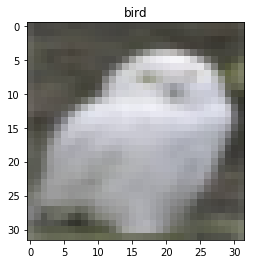

pred_x dog 0.3891284
pred_adv cat 0.36533242


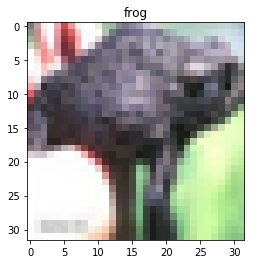

pred_x deer 0.38885352
pred_adv bird 0.3531601


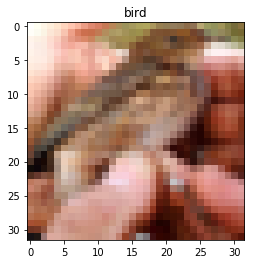

pred_x frog 0.29359198
pred_adv cat 0.26450765


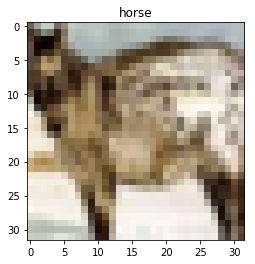

pred_x frog 0.27597737
pred_adv dog 0.25126556


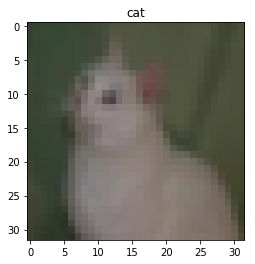

pred_x bird 0.39165902
pred_adv dog 0.3368888


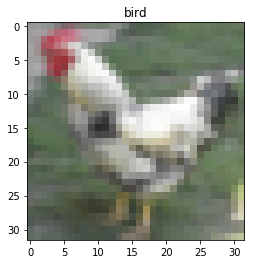

pred_x horse 0.43841633
pred_adv dog 0.42363867


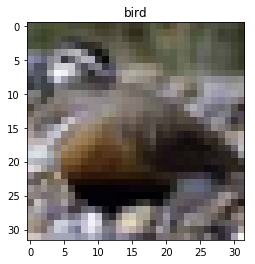

pred_x deer 0.3080512
pred_adv frog 0.28834316


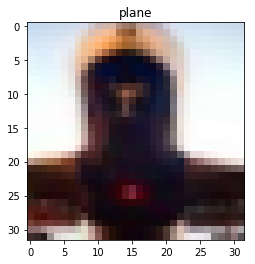

pred_x dog 0.26268378
pred_adv cat 0.23069654


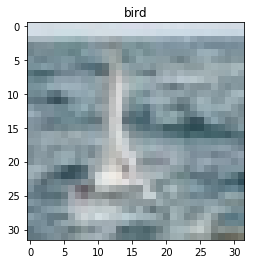

pred_x ship 0.3645325
pred_adv plane 0.33217412


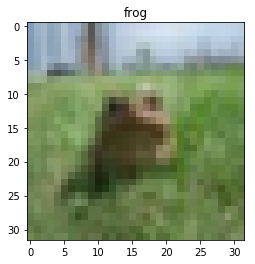

pred_x deer 0.31551105
pred_adv cat 0.30337152


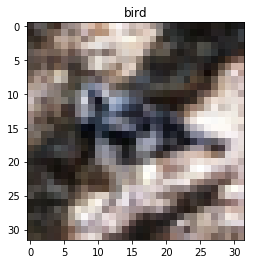

pred_x frog 0.3139807
pred_adv dog 0.27810484


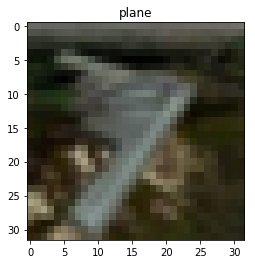

pred_x frog 0.49751416
pred_adv bird 0.4165553


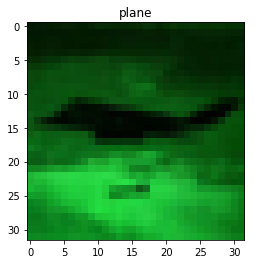

pred_x deer 0.40045854
pred_adv frog 0.39576337


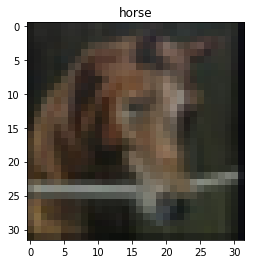

pred_x dog 0.348054
pred_adv cat 0.29094747


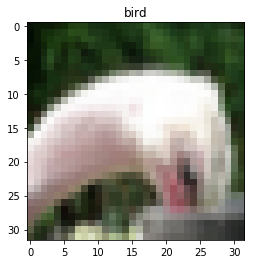

pred_x dog 0.3692634
pred_adv horse 0.33638972


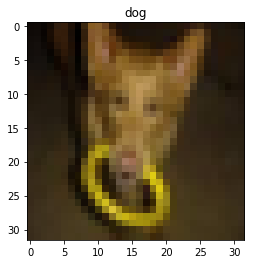

pred_x frog 0.37529278
pred_adv cat 0.34203014


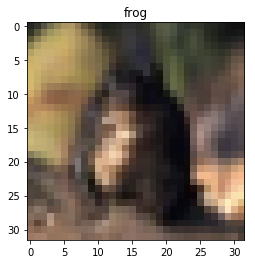

pred_x dog 0.38501778
pred_adv cat 0.33807695


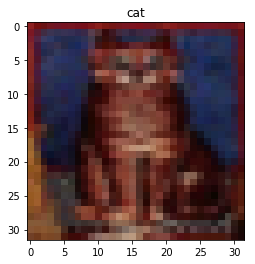

pred_x frog 0.41107383
pred_adv dog 0.36199242


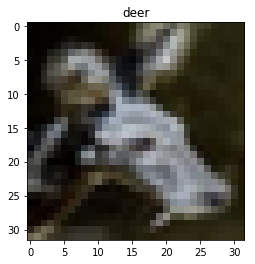

pred_x horse 0.27623588
pred_adv frog 0.26761293


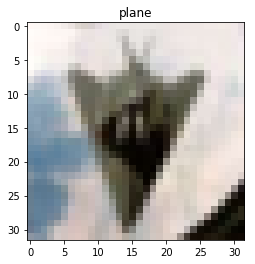

pred_x dog 0.369425
pred_adv cat 0.3064999


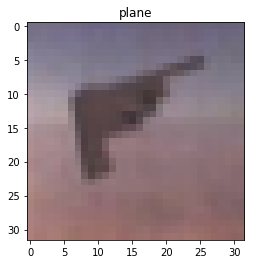

pred_x cat 0.3379681
pred_adv bird 0.33330747


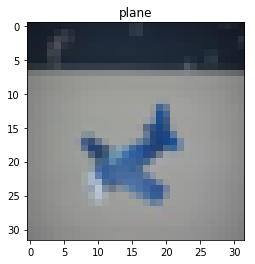

pred_x dog 0.3448846
pred_adv bird 0.35453314


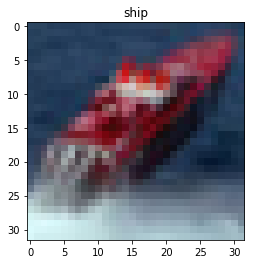

pred_x truck 0.30403116
pred_adv frog 0.3103506


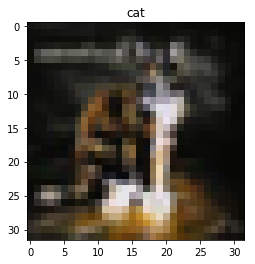

pred_x horse 0.4252356
pred_adv dog 0.41196564


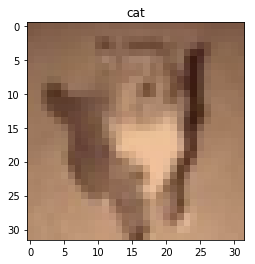

pred_x frog 0.25581345
pred_adv dog 0.28442183


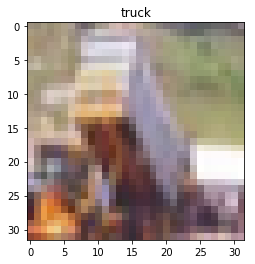

pred_x deer 0.31258842
pred_adv horse 0.29370338


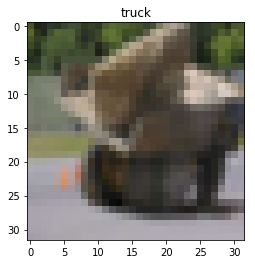

pred_x deer 0.35040715
pred_adv cat 0.34167916


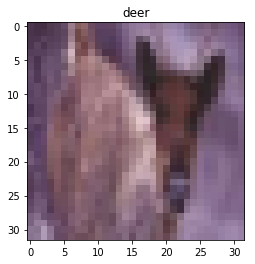

pred_x dog 0.4266078
pred_adv cat 0.40095094


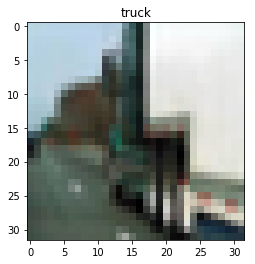

pred_x plane 0.3689818
pred_adv ship 0.38134202


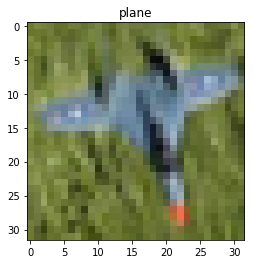

pred_x deer 0.3349969
pred_adv bird 0.32868752


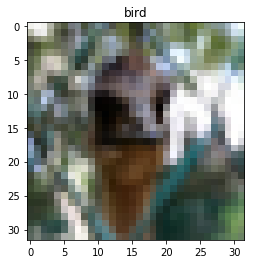

pred_x frog 0.3084884
pred_adv dog 0.29856414


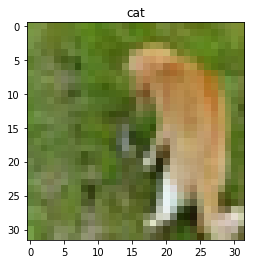

pred_x bird 0.4470325
pred_adv deer 0.39568672


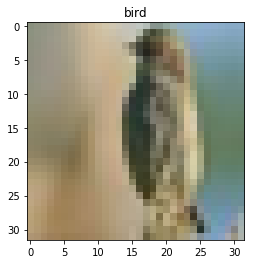

pred_x horse 0.32563993
pred_adv cat 0.30514285


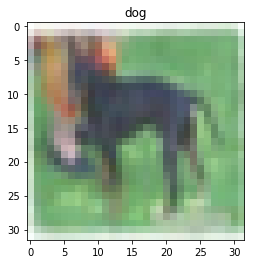

pred_x horse 0.47094166
pred_adv deer 0.4527633


In [27]:
for i in pred_not_train_x_adv_y_idxs:
    pred_x_classes, pred_x_per = predict(x_train[i], model_name)
    pred_adv_classes, pred_adv_per = predict(adv_train[i], model_name)
    
    plt.imshow(x_train[i])
    plt.title(label[int(y_train[i])])
    plt.show()
    
    print('pred_x', label[pred_x_classes], pred_x_per)
    print('pred_adv', label[pred_adv_classes], pred_adv_per)

In [28]:
pred_not_train_x_adv_y_idxs

[1070,
 1481,
 1947,
 2266,
 4008,
 5384,
 7142,
 8957,
 9899,
 10842,
 11079,
 13008,
 13011,
 13406,
 14712,
 17477,
 17776,
 18011,
 18149,
 18243,
 19727,
 19982,
 20064,
 20523,
 21544,
 21587,
 22670,
 22723,
 23211,
 23859,
 24237,
 25527,
 28114,
 28227,
 28312,
 28595,
 29271,
 31469,
 31972,
 33616,
 34428,
 34980,
 35022,
 35823,
 36506,
 37663,
 37694,
 38459,
 38753,
 39329,
 40416,
 40787,
 41175,
 41443,
 41782,
 42401,
 42587,
 45259,
 45652,
 45892,
 45897,
 46503,
 46645,
 47084,
 47517,
 47663,
 47849,
 48250,
 48768,
 49008,
 49014]

In [32]:
deleted_x_train = np.delete(x_train, pred_not_train_x_adv_y_idxs, 0)
deleted_x_train.shape

(49929, 32, 32, 3)

In [33]:
deleted_y_train = np.delete(y_train, pred_not_train_x_adv_y_idxs, 0)
deleted_y_train.shape

(49929, 1)